# Step 1. Import the necessary libraries and functions

### A. Add "import seaborn as sb"  

### B. Place the functions that uses the method of least squares and correlation coefficient 


In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

    

def det(A):
    answer = (A[0][0] * A[1][1]) - (A[0][1] * A[1][0])
    return answer

def correlation_array(array1, array2):
    x_sum = np.sum(array1)
    y_sum = np.sum(array2)
    e1 = np.sum(np.multiply(array1, array2))
    x_sq = np.sum(np.power(array1, 2))
    y_sq = np.sum(np.power(array2,2))
    
    e1 = e1*len(array1)

    x_sq_sub = (x_sq *len(array1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(array2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr
    
def least_squares_array(array1, array2):
    x_sq = np.sum(np.power(array1, 2))
    x_sum = np.sum(array1)
    xy_sum = np.sum(np.multiply(array1, array2))
    y_sum = np.sum(array2)
    
    array_reg = np.array([[x_sq, x_sum], [x_sum, len(array1)]])
    array_2 = np.array([xy_sum, y_sum])
    array_inverse = np.linalg.inv(array_reg)
    answer = np.dot(array_inverse, array_2)
    return answer

def scatter_plot(x_list, y_list, color='blue', point='o'):
    plt.scatter(x_list, y_list, c=color, marker=point)
    plt.show()
    
def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
    else:
        plt.plot(x_list, y_list, color=colour, marker=mark, linestyle=line)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def slope_to_points(slope, intercept, point_nums):
    list_x = []
    list_y = []
    for num in range(0, point_nums):
        list_x.append(num)
        y_point = slope * num + intercept
        list_y.append(y_point)
    return list_x, list_y

# Step 2. Import the Automobile_data dataset from GitHub. Assign it to a variable called cars.

Here is the link to the raw data:
https://raw.githubusercontent.com/bobg207/Honors_Data_Analysis/master/Automobile_data.csv

In [2]:
path = '../input/automobile-data/Automobile_data.csv'
cars=pd.read_csv(path)
cars.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


# Step 3: There's an extra "index" column.  Delete that column.

In [3]:
cars.drop(['index'], axis=1, inplace=True)
cars.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


# Step 4. Change categorical data to numerical.
We are going to be looking for relationships in the data and will need the data to be numerical to do this.  Change the data, in the "num-of-cylinders" column to the numerical equivalent.  To do this:
1.  Create a function that takes the number of cylinders, as a string, as input and returns the numerical equivalent.
2.  get the column to be changed and call .apply( ) on that column passing in the name of your conversion funtion **WITHOUT** the parameter



```
    df['col_name'] = df['col_name'].apply(function_name)
```


3.  `.apply( )` does not have an `inplace=` parameter so notice the alternative way to make the change permanent

In [4]:
def number_int_cars(number):
    words = "zero one two three four five six seven eight nine ten eleven twelve".split()
    return words.index(number)
cars["num-of-cylinders"] = cars["num-of-cylinders"].apply(number_int_cars)
cars["num-of-cylinders"]

0     4
1     4
2     6
3     4
4     5
     ..
56    4
57    4
58    4
59    4
60    4
Name: num-of-cylinders, Length: 61, dtype: int64

# Step 5.  Create a dataframe of correlations by using your correlation coeffecient function.



1.   Create a dictionary filled with the data, index names, and column names
2.   Convert the dictionary to a dataframe, so that it returns the following table

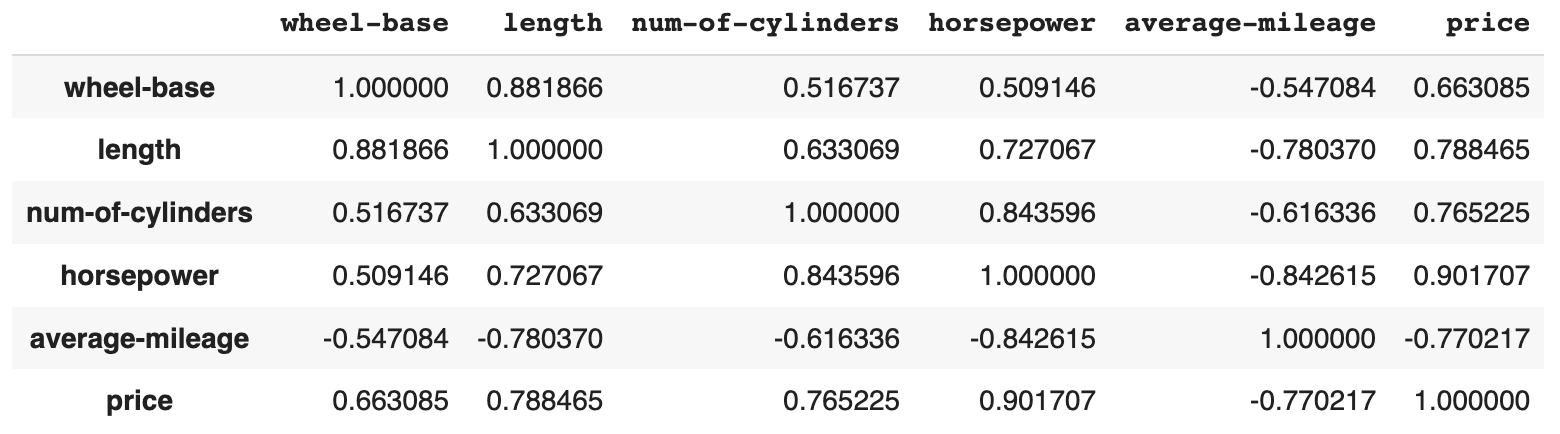



In [5]:
cars_dict = {"":[]}
for columns in (cars.drop(['company', 'body-style',"engine-type"], axis=1)).columns:
    cars_dict[columns] = []
    cars_dict[""].append(columns)
for item in list(cars_dict)[1:]:
    for item2 in list(cars_dict)[1:]:
        cars_dict[item].append(correlation_array(cars[item],cars[item2]))
cars_new = pd.DataFrame.from_dict(cars_dict)
cars_new

,,wheel-base,length,num-of-cylinders,horsepower,average-mileage,price
0,wheel-base,1.000000,0.878381,0.499083,0.463421,-0.547325,0.657290
1,length,0.878381,1.000000,0.614195,0.668555,-0.788429,0.784834
2,num-of-cylinders,0.499083,0.614195,1.000000,0.852514,-0.622661,0.671783
3,horsepower,0.463421,0.668555,0.852514,1.000000,-0.808804,0.725064
4,average-mileage,-0.547325,-0.788429,-0.622661,-0.808804,1.000000,-0.743430
5,price,0.657290,0.784834,0.671783,0.725064,-0.743430,1.000000


# Step 6. To visualize the correlation relationships via Seaborn Heatmap.


```
sb.heatmap(df_name, annot=True)
plt.show()
```

** rotate the yticks so they are readable

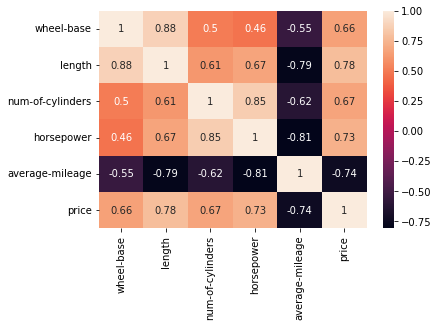

In [6]:
sb.heatmap((cars_new.drop([""], axis=1)),  annot=True, yticklabels=cars_new[''])
plt.show()

# Step 7. Create a scatterplot of the 2 variables that have the hightest, positive correlation.




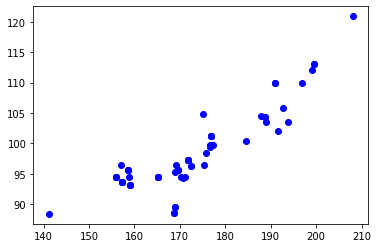

In [7]:
scatter_plot(cars["length"], cars["wheel-base"], color='blue', point='o')
plt.show()

# Step 8. Create a scatterplot of the 2 variables that have the lowest, positive correlation.

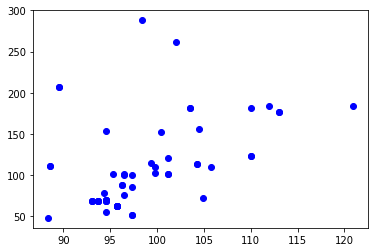

In [8]:
scatter_plot(cars["wheel-base"], cars["horsepower"], color='blue', point='o')
plt.show()

# Step 9. Create a scatterplot of the 2 variables that have the "highest", negative correlation.

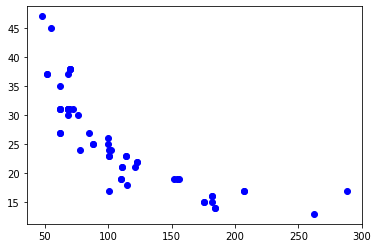

In [9]:
scatter_plot(cars["horsepower"], cars["average-mileage"], color='blue', point='o')
plt.show()

# Step 10: Find regression line using Least Squares Regression

* Do this first for the HP v Price data

### 10a.  Drop the rows that have NaN's and reset the indices

Once the rows have been dropped there'll be gaps in the indices.  This will cause problems if it's necessary to loop through the indices.


In [10]:
#31,32,63
cars.dropna()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,4,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,5,115,18,17450.0
5,audi,sedan,99.8,177.3,ohc,5,110,19,15250.0
6,audi,wagon,105.8,192.7,ohc,5,110,19,18920.0
7,bmw,sedan,101.2,176.8,ohc,4,101,23,16430.0
8,bmw,sedan,101.2,176.8,ohc,4,101,23,16925.0
9,bmw,sedan,101.2,176.8,ohc,6,121,21,20970.0


### 10b. Get the HP and Price columns.
1. Get the HP column and assign it to a variable.
2. Get the Price column and assign it to a variable.

In [11]:
hp = cars['horsepower']
money = cars['price']
print(hp,money)

0     111
1     111
2     154
3     102
4     115
     ... 
56     85
57     52
58    100
59    114
60    114
Name: horsepower, Length: 61, dtype: int64 0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
       ...   
56     7975.0
57     7995.0
58     9995.0
59    12940.0
60    13415.0
Name: price, Length: 61, dtype: float64


### 10c. Use your linear regression function to get the slope and intercept for the regression line.


In [12]:
m, b = least_squares_array(hp, money)
print(m,b)

156.22289915341264 -2218.761533283643


### 10d. Use the slope, intercept, and horsepower list to create a list of expected price values.

 * remember that numpy arrays allow for arithmetic operations to be performed on the entire array
  * np.array_new = np.array_old * value_1 + value_2

In [13]:
xes, yes= slope_to_points(m, b, max(cars["horsepower"]))
print(xes[0:5], yes[0:5])

[0, 1, 2, 3, 4] [-2218.761533283643, -2062.5386341302305, -1906.3157349768178, -1750.092835823405, -1593.8699366699925]


### 10e. Create a scatterplot of HP v Price with the regression line included.

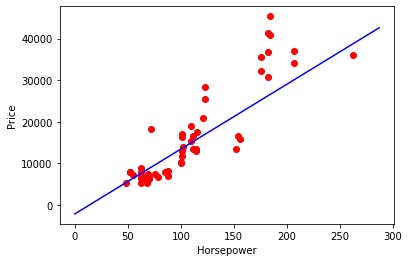

In [14]:
line_graph([hp, xes], [money,yes], x_label = "Horsepower", y_label = "Price", amount=2, colour=['red', 'blue'], mark=['o',''], line=['', '-'])
plt.show()

# Step 11: Find and graph the regression line for Average-Mileage vs. Horsepower

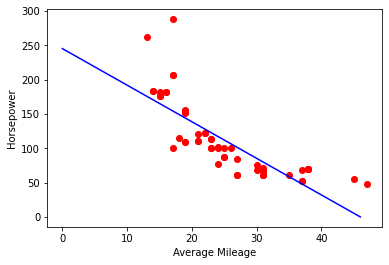

In [15]:
miles = cars['average-mileage']
slope2, intercept2 = least_squares_array(miles, hp)
xes2, yes2= slope_to_points(slope2, intercept2, max(cars["average-mileage"]))
line_graph([miles, xes2], [hp,yes2], x_label = "Average Mileage", y_label = "Horsepower", amount=2, colour=['red', 'blue'], mark=['o',''], line=['', '-'])
plt.show()